In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt


# df = pd.read_csv('glass_transition.csv', encoding='ISO-8859-1')

# df_mean = df.groupby('Name').agg({'Tm / K': 'mean', 'Tg / K': 'mean'}).reset_index()


# df_complete = df.drop(columns=['Tm / K', 'Tg / K', 'Reference(Tm)', 'Reference(Tg)']).drop_duplicates().merge(df_mean, on='Name')




##Applying different Models Now

In [ ]:
import pandas as pd

# Load the dataset
# file_path = '/content/Updated_Dataset_with_Ratios.csv'
file_path = '/content/final_dataset.csv'

data = pd.read_csv(file_path)

data.head()


,Name,Formula,Smiles,#CH3,#CH2,#CH,#C,#OH,#C-O-C,#O=C,...,M / g/mol,Tm / K,Tg / K,Tg/Tm,Tm/Tg,#S,#branching,num_branches_pysmiles,num_branches_ro,num_branches_RDKIT
0,glucose,C6H12O6,C(C1C(C(C(C(O1)O)O)O)O)O,0,1,4,1,5,0,1,...,180.0,419.675,300.666667,0.716427,1.395815,0,5,5,5,5
1,dextrose,C6H12O6,OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C=O,0,1,4,1,5,0,1,...,180.0,432.000,310.000000,0.717593,1.393548,0,5,4,4,4
2,tartaric acid,C4H6O6,OC(C(O)C(O)=O)C(O)=O,0,0,2,2,4,0,2,...,150.0,430.000,288.775000,0.671570,1.489049,0,4,4,4,4
3,"1,2,3-propanetricarboxylic acid",C6H8O6,OC(=O)CC(CC(O)=O)C(O)=O,0,2,1,3,3,0,3,...,176.0,431.150,276.450000,0.641192,1.559595,0,4,4,4,4
4,"1,2,4-butanetricarboxylic acid",C7H10O6,OC(=O)CCC(CC(O)=O)C(O)=O,0,3,1,3,3,0,3,...,190.0,391.650,272.800000,0.696540,1.435667,0,4,4,4,4


In [ ]:
X = data.drop(columns=['Name', 'Formula','Smiles','Tg / K','Tm/Tg','Tg/Tm','Tm / K','#branching','num_branches_ro','num_branches_RDKIT','num_branches_pysmiles','O:C'])
y_tg = data['Tg / K']  # Target for glass transition temperature

In [ ]:
X.head()

,#CH3,#CH2,#CH,#C,#OH,#C-O-C,#O=C,DBA,#N,#Hal,#C:#OH,DBA:#C,#CH:#C,M / g/mol,#S
0,0,1,4,1,5,0,1,1,0,0,0.2,1.0,4.000000,180.0,0
1,0,1,4,1,5,0,1,1,0,0,0.2,1.0,4.000000,180.0,0
2,0,0,2,2,4,0,2,2,0,0,0.5,1.0,1.000000,150.0,0
3,0,2,1,3,3,0,3,3,0,0,1.0,1.0,0.333333,176.0,0
4,0,3,1,3,3,0,3,3,0,0,1.0,1.0,0.333333,190.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train_tg, X_test_tg, y_train_tg, y_test_tg = train_test_split(X, y_tg, test_size=0.10, random_state=42)

scaler = StandardScaler()

X_train_tg_scaled = scaler.fit_transform(X_train_tg)
X_test_tg_scaled = scaler.transform(X_test_tg)

# Checking the shapes of the training and testing sets
(X_train_tg_scaled.shape, X_test_tg_scaled.shape)


((360, 15), (40, 15))

In [ ]:
X.head()

,#CH3,#CH2,#CH,#C,#OH,#C-O-C,#O=C,DBA,#N,#Hal,#C:#OH,DBA:#C,#CH:#C,M / g/mol,#S
0,0,1,4,1,5,0,1,1,0,0,0.2,1.0,4.000000,180.0,0
1,0,1,4,1,5,0,1,1,0,0,0.2,1.0,4.000000,180.0,0
2,0,0,2,2,4,0,2,2,0,0,0.5,1.0,1.000000,150.0,0
3,0,2,1,3,3,0,3,3,0,0,1.0,1.0,0.333333,176.0,0
4,0,3,1,3,3,0,3,3,0,0,1.0,1.0,0.333333,190.0,0


#Glass Transition Temperature Prediction

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42)  # Extra Trees model added here
}

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return mae, rmse, r2


In [ ]:
results_tg = {}
for name, model in models.items():
    mae, rmse, r2 = train_and_evaluate_model(model, X_train_tg_scaled, y_train_tg, X_test_tg_scaled, y_test_tg)
    results_tg[name] = {"MAE": mae, "RMSE": rmse, "R^2": r2}
results_tg

print("Model Performance for Tg Prediction:")
print("-" * 60)
for model_name, metrics in results_tg.items():
    print(f"Model: {model_name}")
    print(f"    MAE: {metrics['MAE']:.4f}")
    print(f"    RMSE: {metrics['RMSE']:.4f}")
    print(f"    R^2: {metrics['R^2']:.4f}")
    print("-" * 60)

Model Performance for Tg Prediction:
------------------------------------------------------------
Model: Linear Regression
    MAE: 40.4146
    RMSE: 56.3224
    R^2: 0.6857
------------------------------------------------------------
Model: Random Forest
    MAE: 19.6565
    RMSE: 31.6322
    R^2: 0.9009
------------------------------------------------------------
Model: Gradient Boosting
    MAE: 20.8037
    RMSE: 32.3908
    R^2: 0.8961
------------------------------------------------------------
Model: XGBoost
    MAE: 23.0336
    RMSE: 36.0025
    R^2: 0.8716
------------------------------------------------------------
Model: Extra Trees
    MAE: 17.2199
    RMSE: 29.2748
    R^2: 0.9151
------------------------------------------------------------


##Considering Mass and Branching

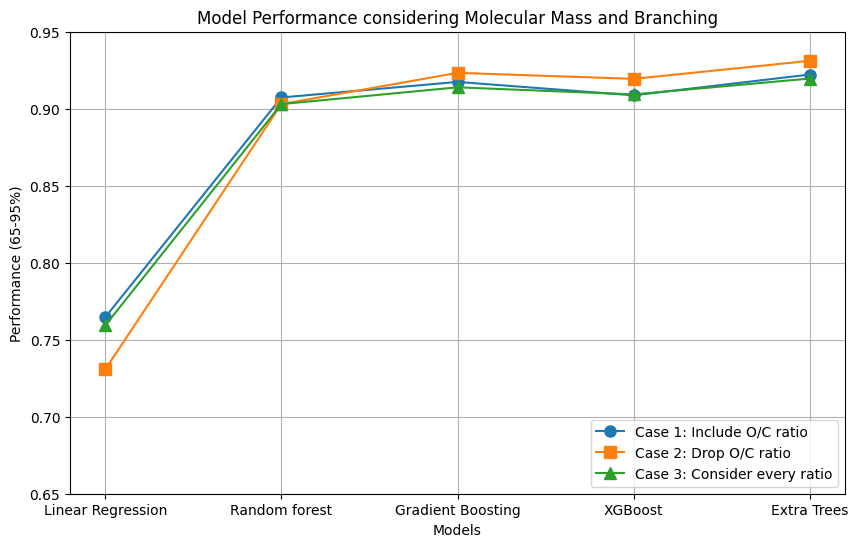

In [ ]:
import matplotlib.pyplot as plt

# Data from the image
models = ["Linear Regression", "Random forest", "Gradient Boosting", "XGBoost", "Extra Trees"]

case1 = [0.7646, 0.9073, 0.9174, 0.9087, 0.9222]
case2 = [0.7307, 0.9030, 0.9233, 0.9194, 0.9311]
case3 = [0.7593, 0.9030, 0.9139, 0.9093, 0.9196]

# Define shapes for different models
shapes = ['o-', 's-', '^-', 'd-', 'p-']

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting each case
plt.plot(models, case1, shapes[0], label="Case 1: Include O/C ratio", markersize=8)
plt.plot(models, case2, shapes[1], label="Case 2: Drop O/C ratio", markersize=8)
plt.plot(models, case3, shapes[2], label="Case 3: Consider every ratio", markersize=8)

# Adding titles and labels
plt.title("Model Performance considering Molecular Mass and Branching")
plt.xlabel("Models")
plt.ylabel("Performance (65-95%)")
plt.ylim(0.65, 0.95)
plt.grid(True)

# Adding a legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


##Only Considering Molecular Mass and not branching

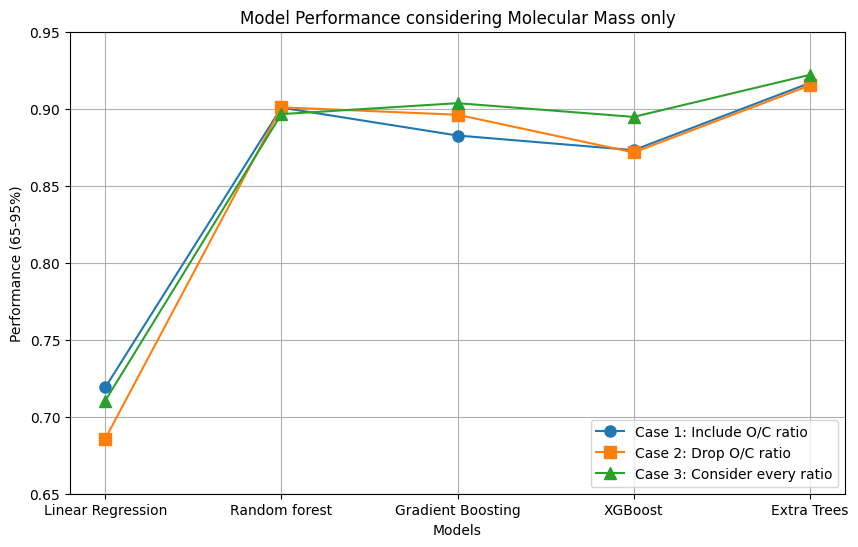

In [ ]:
import matplotlib.pyplot as plt

# Data from the image
models = ["Linear Regression", "Random forest", "Gradient Boosting", "XGBoost", "Extra Trees"]

case1 = [0.7190, 0.9007, 0.8826, 0.8731, 0.9167]
case2 = [0.6857, 0.9009, 0.8961, 0.8716, 0.9151]
case3 = [0.7104, 0.8965, 0.9036, 0.8947, 0.9220]

# Define shapes for different models
shapes = ['o-', 's-', '^-', 'd-', 'p-']

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting each case
plt.plot(models, case1, shapes[0], label="Case 1: Include O/C ratio", markersize=8)
plt.plot(models, case2, shapes[1], label="Case 2: Drop O/C ratio", markersize=8)
plt.plot(models, case3, shapes[2], label="Case 3: Consider every ratio", markersize=8)

# Adding titles and labels
plt.title("Model Performance considering Molecular Mass only")
plt.xlabel("Models")
plt.ylabel("Performance (65-95%)")
plt.ylim(0.65, 0.95)
plt.grid(True)

# Adding a legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


##Only Consider Branching and Not Molecular Mass

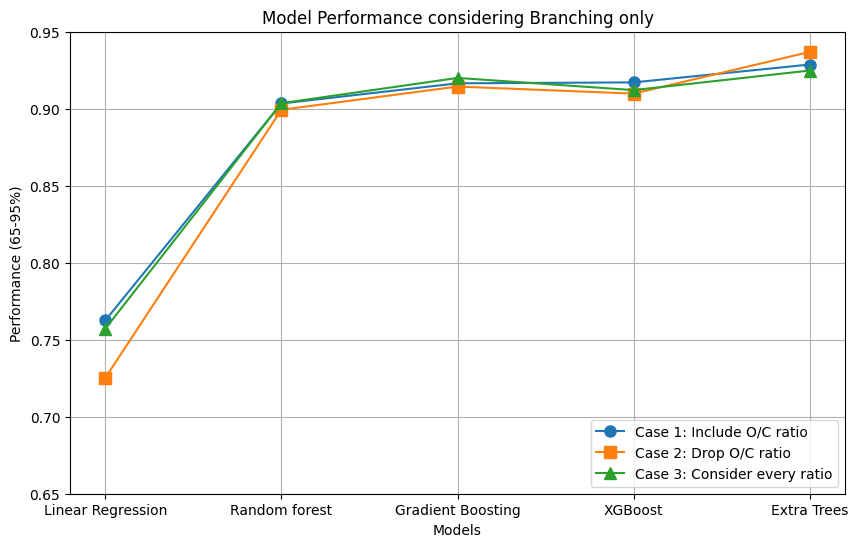

In [ ]:
import matplotlib.pyplot as plt

# Data from the image
models = ["Linear Regression", "Random forest", "Gradient Boosting", "XGBoost", "Extra Trees"]

case1 = [0.7625, 0.9034, 0.9165, 0.9171, 0.9287]
case2 = [0.7252, 0.8993, 0.9144, 0.9098, 0.9369]
case3 = [0.7571, 0.9036, 0.9200, 0.9121, 0.9248]

# Define shapes for different models
shapes = ['o-', 's-', '^-', 'd-', 'p-']

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting each case
plt.plot(models, case1, shapes[0], label="Case 1: Include O/C ratio", markersize=8)
plt.plot(models, case2, shapes[1], label="Case 2: Drop O/C ratio", markersize=8)
plt.plot(models, case3, shapes[2], label="Case 3: Consider every ratio", markersize=8)

# Adding titles and labels
plt.title("Model Performance considering Branching only")
plt.xlabel("Models")
plt.ylabel("Performance (65-95%)")
plt.ylim(0.65, 0.95)
plt.grid(True)

# Adding a legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


##Considering only branching and not molecular mass

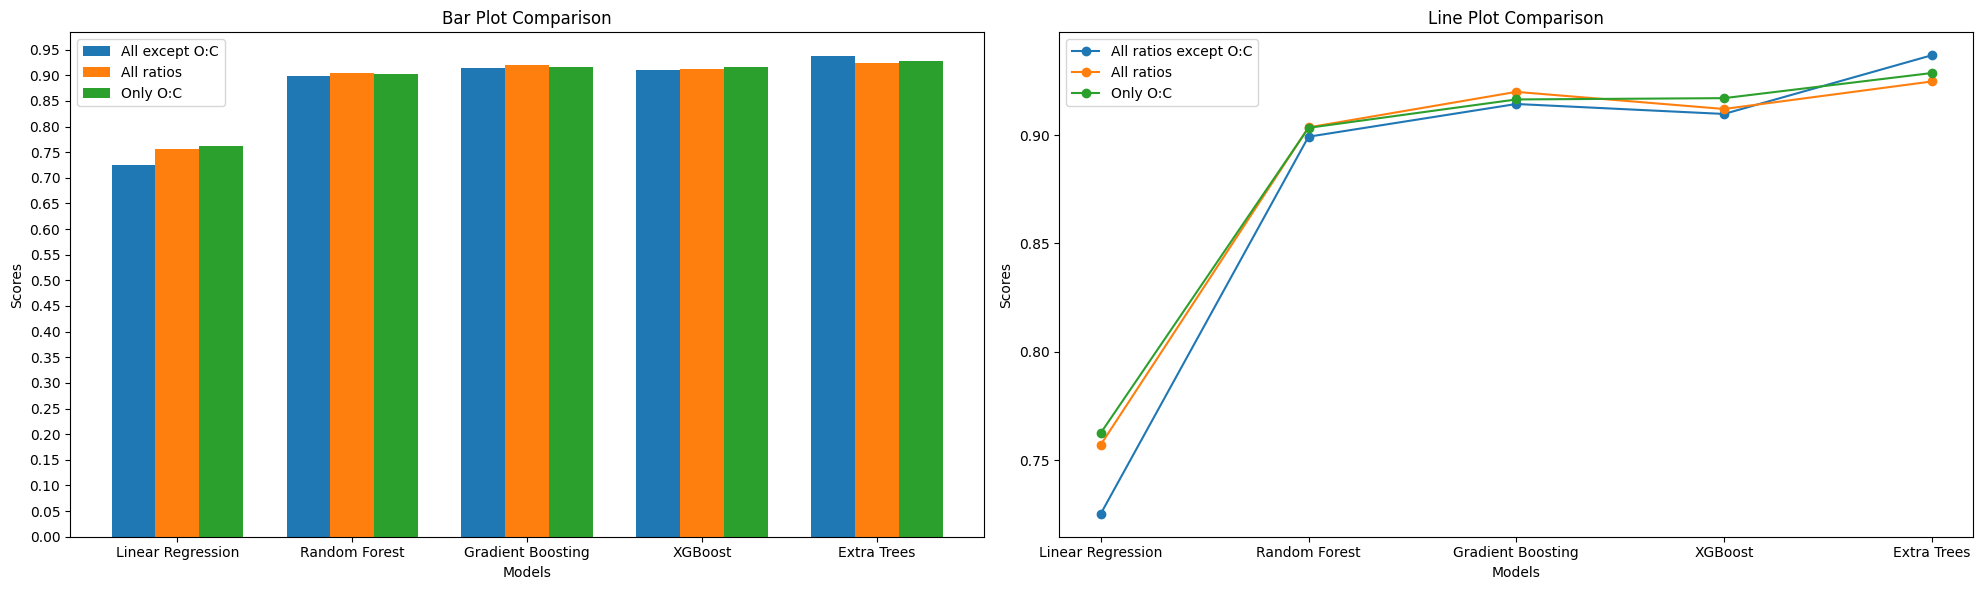

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted data from the image
labels = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Extra Trees']

# Scenario 1: Considering all ratios except O:C
data_1 = [0.7252, 0.8993, 0.9144, 0.9098, 0.9369]

# Scenario 2: Considering all the ratios
data_2 = [0.7571, 0.9036, 0.9200, 0.9121, 0.9248]

# Scenario 3: Considering only O:C ratio
data_3 = [0.7625, 0.9034, 0.9165, 0.9171, 0.9287]

# Create subplots to compare different visualizations
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Bar plot
x = np.arange(len(labels))
width = 0.25
axs[0].bar(x - width, data_1, width, label='All except O:C')
axs[0].bar(x, data_2, width, label='All ratios')
axs[0].bar(x + width, data_3, width, label='Only O:C')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Scores')
axs[0].set_title('Bar Plot Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

# Adjusting the y-axis range with a difference of 0.05
axs[0].set_yticks(np.arange(0.0, 1.0, 0.05))

# Line plot
axs[1].plot(labels, data_1, marker='o', label='All ratios except O:C')
axs[1].plot(labels, data_2, marker='o', label='All ratios')
axs[1].plot(labels, data_3, marker='o', label='Only O:C')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Scores')
axs[1].set_title('Line Plot Comparison')
axs[1].legend()

plt.tight_layout()
plt.show()


##Considering Molecular Mass and not Branching

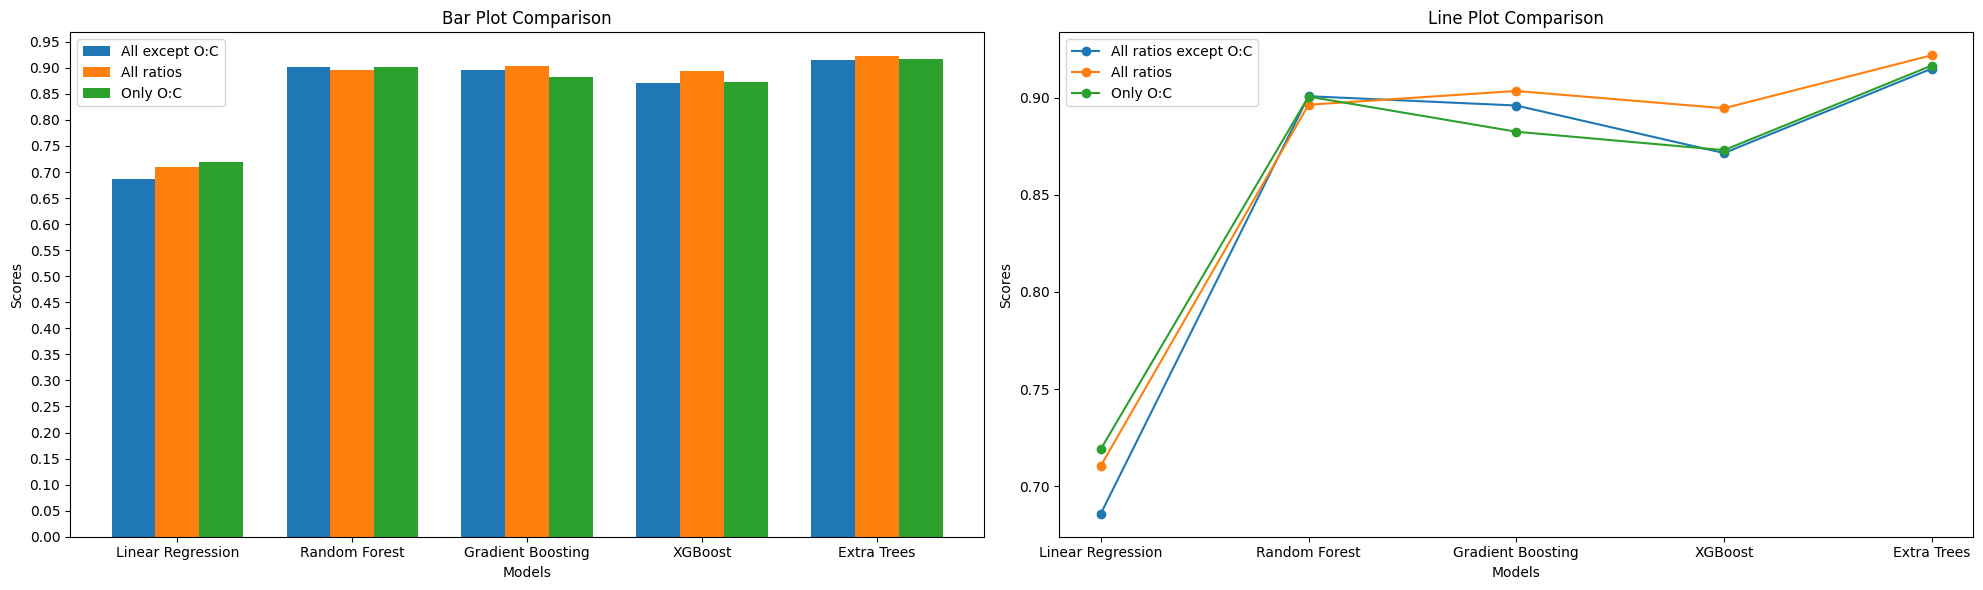

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted data from the image
labels = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Extra Trees']

# Scenario 1: Considering all ratios except O:C
data_1 = [0.6857, 0.9009, 0.8961, 0.8716, 0.9151]

# Scenario 2: Considering all the ratios
data_2 = [0.7104, 0.8965, 0.9036, 0.8947, 0.9220]

# Scenario 3: Considering only O:C ratio
data_3 = [0.7190, 0.9007, 0.8826, 0.8731, 0.9167]

# Create subplots to compare different visualizations
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Bar plot
x = np.arange(len(labels))
width = 0.25
axs[0].bar(x - width, data_1, width, label='All except O:C')
axs[0].bar(x, data_2, width, label='All ratios')
axs[0].bar(x + width, data_3, width, label='Only O:C')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Scores')
axs[0].set_title('Bar Plot Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

# Adjusting the y-axis range with a difference of 0.05
axs[0].set_yticks(np.arange(0.0, 1.0, 0.05))

# Line plot
axs[1].plot(labels, data_1, marker='o', label='All ratios except O:C')
axs[1].plot(labels, data_2, marker='o', label='All ratios')
axs[1].plot(labels, data_3, marker='o', label='Only O:C')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Scores')
axs[1].set_title('Line Plot Comparison')
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# # Define base models
# estimators = [
#     ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
#     ('svr', make_pipeline(StandardScaler(), SVR(C=1, gamma='auto'))),
#     ('gb', GradientBoostingRegressor(n_estimators=10, random_state=42))
# ]

# # Initialize Stacking Regressor
# stacking_regressor = StackingRegressor(
#     estimators=estimators,
#     final_estimator=Ridge(alpha=1)
# )

# # Training the stacking model
# stacking_regressor.fit(X_train_tg_scaled, y_train_tg)

# # Evaluating the stacking model
# predictions = stacking_regressor.predict(X_test_tg_scaled)
# mae = mean_absolute_error(y_test_tg, predictions)
# rmse = np.sqrt(mean_squared_error(y_test_tg, predictions))
# r2 = r2_score(y_test_tg, predictions)

# print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")


MAE: 23.8980, RMSE: 37.4544, R^2: 0.8610


In [ ]:
# from sklearn.model_selection import train_test_split

# # Split training data for blending
# X_train_base, X_holdout, y_train_base, y_holdout = train_test_split(
#     X_train_tg_scaled, y_train_tg, test_size=0.2, random_state=42)

# # Train base models
# model_rf = RandomForestRegressor(random_state=42)
# model_rf.fit(X_train_base, y_train_base)
# predictions_rf = model_rf.predict(X_holdout)

# model_svr = make_pipeline(StandardScaler(), SVR(C=1, gamma='auto'))
# model_svr.fit(X_train_base, y_train_base)
# predictions_svr = model_svr.predict(X_holdout)

# # Create new feature set for the meta-model
# X_meta = np.column_stack((predictions_rf, predictions_svr))

# # Train meta-model
# meta_model = Ridge(alpha=1)
# meta_model.fit(X_meta, y_holdout)

# # Use base models to generate features for test set
# test_predictions_rf = model_rf.predict(X_test_tg_scaled)
# test_predictions_svr = model_svr.predict(X_test_tg_scaled)

# # Stack predictions and predict with meta-model
# X_test_meta = np.column_stack((test_predictions_rf, test_predictions_svr))
# final_predictions = meta_model.predict(X_test_meta)

# # Evaluate
# mae = mean_absolute_error(y_test_tg, final_predictions)
# rmse = np.sqrt(mean_squared_error(y_test_tg, final_predictions))
# r2 = r2_score(y_test_tg, final_predictions)

# print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")


MAE: 21.9267, RMSE: 33.3846, R^2: 0.8896


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 61546.2070 - mae: 231.5300 - mse: 61546.2070 - val_loss: 64036.0703 - val_mae: 236.8174 - val_mse: 64036.0703
Epoch 2/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 61164.7656 - mae: 230.2928 - mse: 61164.7656 - val_loss: 63869.7500 - val_mae: 236.5086 - val_mse: 63869.7500
Epoch 3/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 60694.8008 - mae: 229.9147 - mse: 60694.8008 - val_loss: 63672.0000 - val_mae: 236.1411 - val_mse: 63672.0000
Epoch 4/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61218.8164 - mae: 231.0174 - mse: 61218.8164 - val_loss: 63433.1797 - val_mae: 235.6960 - val_mse: 63433.1797
Epoch 5/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 59467.3477 - mae: 226.8798 - mse: 59467.3477 - val_loss: 63143.2070 - val_mae: 235.1551 - val_mse: 63143.2070
Epoch 6/800
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58988.9688 - mae: 225.9145 - mse: 58988.9688 - val_loss: 62797.6523 - val_mae: 234.5083 - val_mse: 62

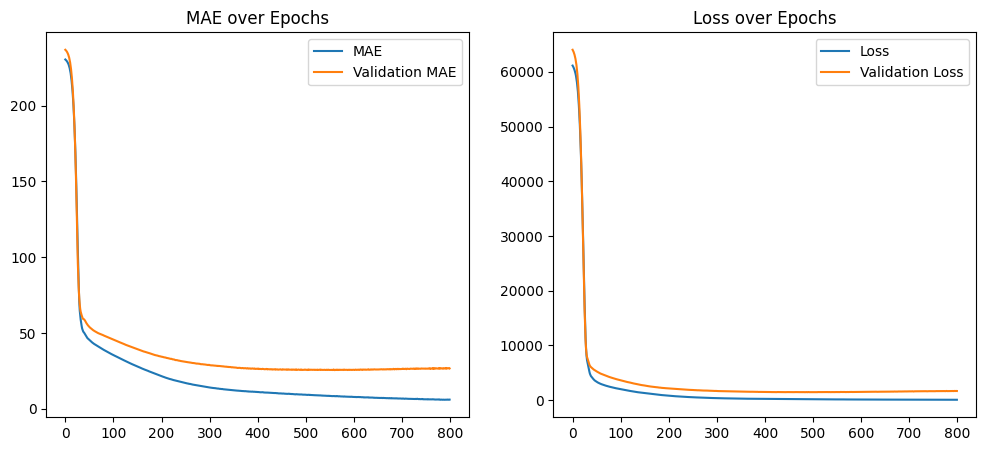

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt

# # Define the neural network structure
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train_tg_scaled.shape[1],)),  # Input layer
#     Dense(64, activation='relu'),  # Hidden layer
#     Dense(32, activation='relu'),  # Additional hidden layer
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(X_train_tg_scaled, y_train_tg, epochs=800, batch_size=100, validation_split=0.2, verbose=1)

# # Evaluate the model on the test set
# test_loss, test_mae, test_mse = model.evaluate(X_test_tg_scaled, y_test_tg, verbose=0)

# # Predict using the trained model
# test_predictions = model.predict(X_test_tg_scaled).flatten()

# # Calculate R^2 score
# test_r2 = r2_score(y_test_tg, test_predictions)

# print(f"Test MAE: {test_mae:.4f}, Test MSE: {test_mse:.4f}, Test R^2: {test_r2:.4f}")

# # Optionally, plot the training progress
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['mae'], label='MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
# plt.title('MAE over Epochs')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss over Epochs')
# plt.legend()
# plt.show()


## XGBoost giving the best model results

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

# # Define a parameter grid to search over
# param_grid = {
#     'max_depth': [1,2,3],
#     'n_estimators': [100,150,200],
#     'learning_rate': [0.1,0.2,0.2],
#     'subsample': [0.7,0.8,0.9],
#     'colsample_bytree': [0.7,0.8,0.9]
# }

# # Initialize the XGBRegressor
# xgb = XGBRegressor(random_state=42)

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# # Perform the grid search on the training data
# grid_search.fit(X_train_tg_scaled, y_train_tg)

# # Get the best parameters
# best_parameters = grid_search.best_params_

# # Train a new XGBRegressor using the best parameters from the grid search
# best_xgb = XGBRegressor(**best_parameters)
# best_xgb.fit(X_train_tg_scaled, y_train_tg)

# best_predictions = best_xgb.predict(X_test_tg_scaled)

# # Predict on the test set with the best model
# best_rmse = np.sqrt(mean_squared_error(y_test_tg, best_predictions))

# # Calculate R^2 score with the best model
# best_r2 = r2_score(y_test_tg, best_predictions)

# # Calculate MAE with the best model
# best_mae = mean_absolute_error(y_test_tg, best_predictions)

# print("Best Parameters:", best_parameters)
# print("Best RMSE:", best_rmse)
# print("Best R^2 Score:", best_r2)
# print("Best MAE:", best_mae)

##Code to take user Input

In [ ]:
# def predict_glass_transition_temperature(input_features):

#     input_df = pd.DataFrame([input_features])


#     input_scaled = scaler.transform(input_df)


#     predicted_tg = best_xgb.predict(input_scaled)

#     return predicted_tg[0]

# user_input = {
#     '#CH3': 2,
#     '#CH2': 4,
#     '#CH': 0,
#     '#C ': 0,
#     '#OH': 0,
#     '#C-O-C': 0,
#     '#O=C': 0,
#     'DBA': 0,
#     '#N': 0,
#     '#Hal': 0,
#     'O:C': 0,
#     'M / g/mol': 86.18,
#     'Tm / K': 178,
#     'Tg/Tm': 0.67,
#     '#S': 0,
#     '#branching': 0
# }




# predicted_tg = predict_glass_transition_temperature(user_input)
# print("Predicted Glass Transition Temperature:", predicted_tg)
